C:\Users\LENOVO\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Conteo por sexo:
sexo
HOMBRE             3954
MUJER              1515
SIN INFORMACION      14
Name: count, dtype: int64

Conteo por edad:
edad
ADOLESCENCIA (12-17 AÑOS)      5099
INFANCIA (6-11 AÑOS)            361
PRIMERA INFANCIA (0-5 AÑOS)      23
Name: count, dtype: int64

Reclutamiento por año:
fecha
1962      1
1970      1
1978      1
1979      3
1983      4
1984      3
1985      2
1986      7
1987      4
1988     11
1989     15
1990     16
1991      5
1992     10
1993     16
1994     28
1995     32
1996     48
1997     53
1998     77
1999    136
2000    257
2001    348
2002    511
2003    655
2004    699
2005    497
2006    385
2007    304
2008    218
2009    207
2010    235
2011    175
2012    156
2013    128
2014    102
2015     51
2016     13
2017      8
2018      8
2019      9
2020     12
2021      5
2022      5
2023     10
2024     12
dtype: int64

Top 10 departamentos con más casos:
departamento
ANTIOQUIA          871
SIN INFORMACION    510
META               484
CAQUETA  

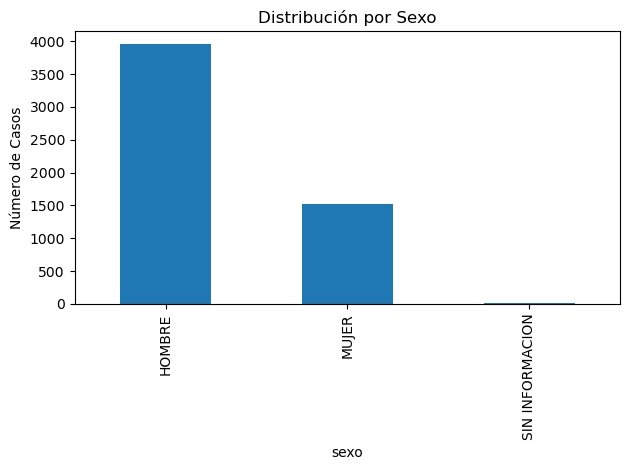

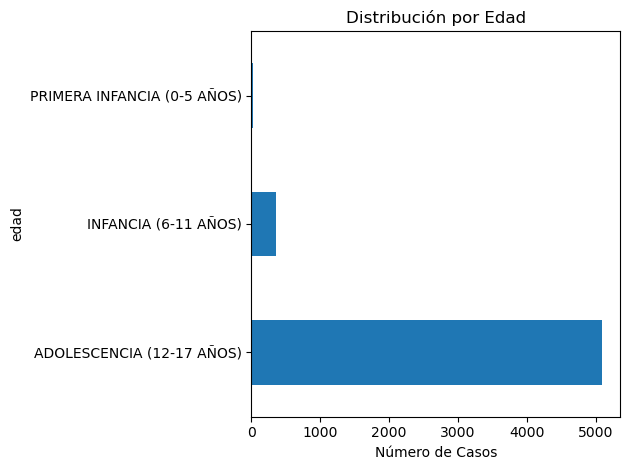

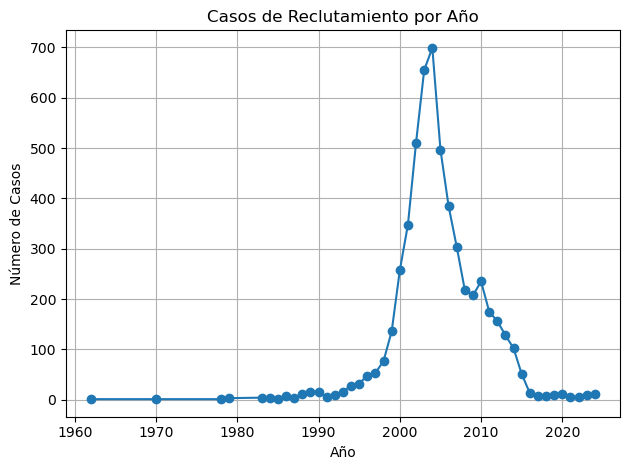

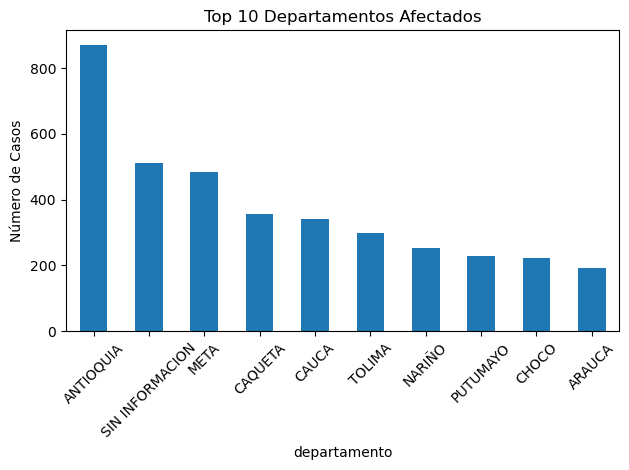

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo
df = pd.read_excel("VictimasRU_202503.xlsx")

# 1. Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 2. Convertir año, mes, día
df['año'] = pd.to_numeric(df['año'], errors='coerce')
df['mes'] = pd.to_numeric(df['mes'], errors='coerce')
df['día'] = pd.to_numeric(df['día'], errors='coerce')

# 3. Crear columna de fecha válida
df['fecha'] = pd.to_datetime(dict(
    year=df['año'].fillna(1).astype(int),
    month=df['mes'].replace(0, 1).fillna(1).astype(int),
    day=df['día'].replace(0, 1).fillna(1).astype(int)
), errors='coerce')

# 4. Filtrar registros válidos
filtered_df = df[df['sexo'].notnull() & df['edad'].notnull() & df['fecha'].notnull()]

# 5. Conteo por sexo
sexo_counts = filtered_df['sexo'].value_counts()
print("Conteo por sexo:")
print(sexo_counts)

# 6. Conteo por edad
edad_counts = filtered_df['edad'].value_counts()
print("\nConteo por edad:")
print(edad_counts)

# 7. Agrupación por año
reclutas_por_año = filtered_df.groupby(filtered_df['fecha'].dt.year).size()
print("\nReclutamiento por año:")
print(reclutas_por_año)

# 8. Top 10 departamentos
reclutas_por_departamento = filtered_df['departamento'].value_counts().head(10)
print("\nTop 10 departamentos con más casos:")
print(reclutas_por_departamento)

# 9. Visualizaciones
# Gráfico por sexo
sexo_counts.plot(kind='bar', title='Distribución por Sexo', ylabel='Número de Casos')
plt.tight_layout()
plt.show()

# Gráfico por edad
edad_counts.plot(kind='barh', title='Distribución por Edad', xlabel='Número de Casos')
plt.tight_layout()
plt.show()

# Gráfico por año
reclutas_por_año.plot(kind='line', marker='o', title='Casos de Reclutamiento por Año')
plt.ylabel('Número de Casos')
plt.xlabel('Año')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico por departamento
reclutas_por_departamento.plot(kind='bar', title='Top 10 Departamentos Afectados')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10. Guardar el DataFrame limpio como archivo CSV
filtered_df.to_csv('Victimas_RU_Limpio.csv', index=False)